# Fetch pre and post synaptic points in a cube
- Quick way to get cubes of synapse data to train a T-bar/PSD detection model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from os.path import expanduser
import pickle

from src.utils import load_preprocessed_connectome, yymmdd_today
from src.catmaid_queries import cx_in_box

In [3]:
tp  = '200507'
datapath = f'~/Data/{tp}_lamina/'   # dir containing Connectome pickle
C = load_preprocessed_connectome(datapath)
cfg = C.cfg   # configurations (for the catmaid info/credentials)

x, y, z = (4000, 8500, 2700)   # cube coords (min corner)
bbox_len = 400   # cube length
outfile = expanduser(datapath) + yymmdd_today() + f"-{x}_{y}_{z}_len{bbox_len}"

Pickle loaded from: /mnt/home/nchua/Data/200507_lamina/200507_preprocessed.pickle


In [4]:
pre, post = cx_in_box(x, y, z, bbox_len, cfg)
display(f"Cube with corner {x, y, z} and lengths {bbox_len} has: {len(pre)} presynaptic connectors")

'Cube with corner (4000, 8500, 2700) and lengths 400 has: 112 presynaptic connectors'

In [5]:
# check and save pre coords
for k, v in pre.items():
    assert(len(v) == 3) # each connector should have one (x, y, z) coord
with open(outfile + '-pre.pickle', 'wb') as fh:
    pickle.dump(pre, fh)

# save post coords
with open(outfile + '-post.pickle', 'wb') as fh:
    pickle.dump(post, fh)

## Open saved files, preview results

In [7]:
with open(outfile + '-pre.pickle', 'rb') as fh:
    pre_data = pickle.load(fh)
with open(outfile + '-post.pickle', 'rb') as fh:
    post_data = pickle.load(fh)

In [8]:
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots(2, 2)
fig.suptitle('Pre')
for k, v in pre_data.items():
    ax[0, 0].scatter(v[0], v[1], c='k')
    ax[0, 1].scatter(v[2], v[1], c='k')
    ax[1, 0].scatter(v[0], v[2], c='k')
    
ax[0, 0].set_title('xy')
ax[0, 1].set_title('zy')
ax[1, 0].set_title('xz')
plt.show()

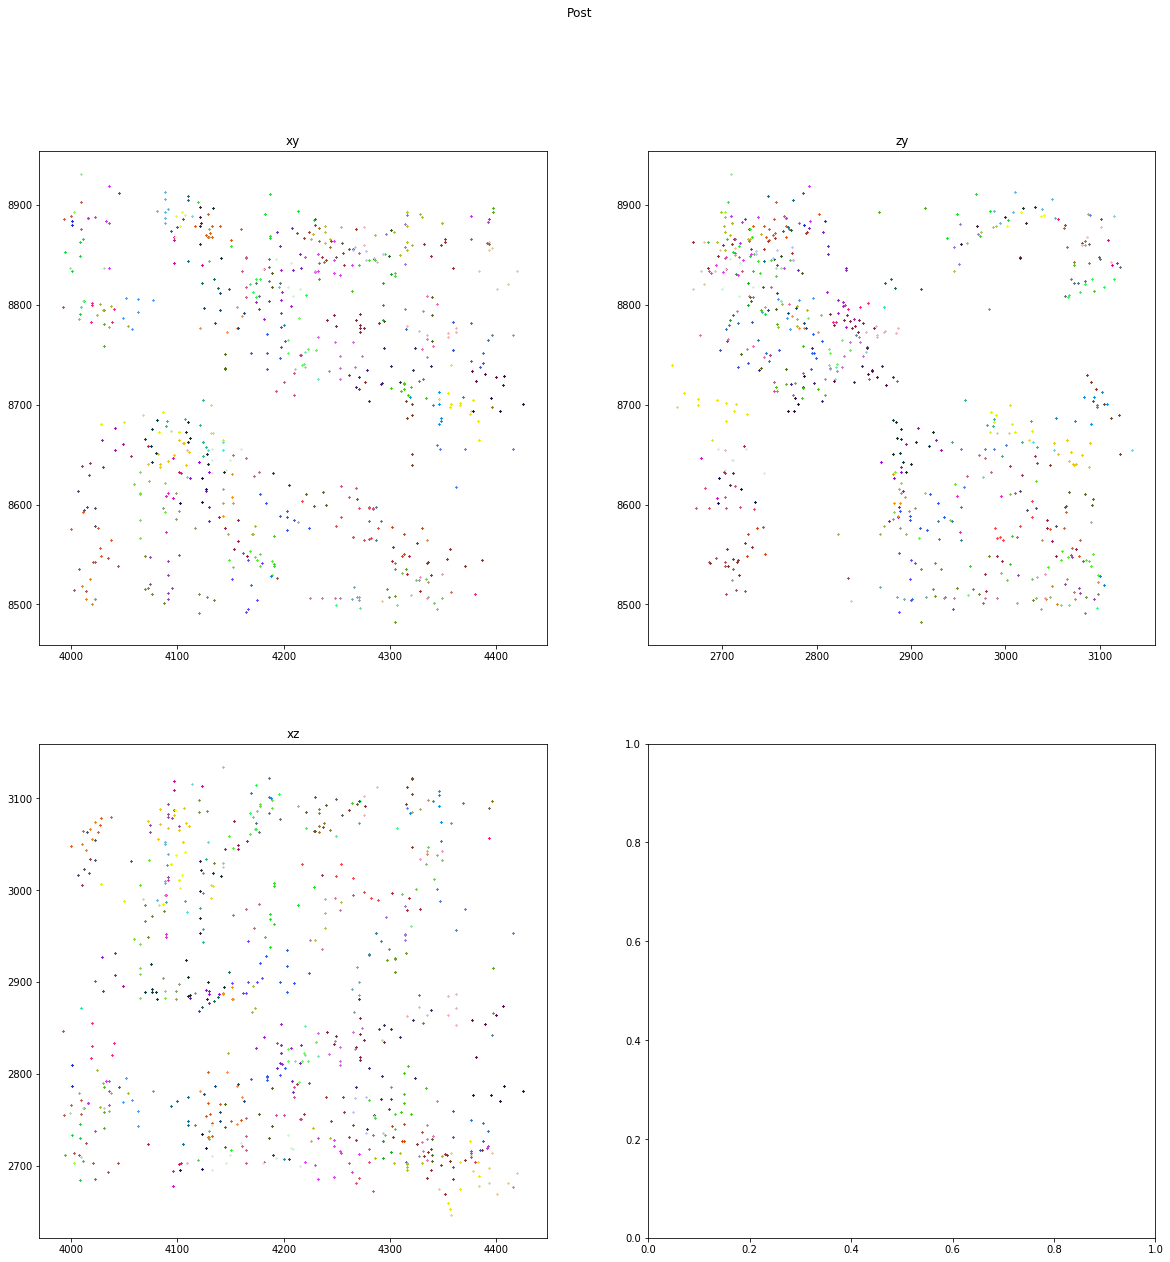

In [9]:
import random

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Post')
for k, v in post_data.items():
    this_c = "%06x" % random.randint(0, 0xFFFFFF)
    this_c = '#' + str(this_c)

    for vv in v:
        ax[0, 0].scatter(vv[0], vv[1], color=this_c, s=2, marker='x')
        ax[0, 1].scatter(vv[2], vv[1], color=this_c, s=2, marker='x')
        ax[1, 0].scatter(vv[0], vv[2], color=this_c, s=2, marker='x')
    
ax[0, 0].set_title('xy')
ax[0, 1].set_title('zy')
ax[1, 0].set_title('xz')
plt.show()

[[4248.3, 8506.0, 2991.4], [4253.175, 8506.0, 2978.3125], [4224.8, 8506.0, 2945.4625], [4235.5, 8506.0, 2935.5]]
[[4338.0, 8849.0, 2695.5], [4352.0, 8866.0, 2712.5], [4331.5, 8860.75, 2710.0], [4348.0, 8860.0, 2700.5], [4352.0, 8863.05, 2668.7125], [4359.0, 8837.0, 2685.0]]
[[4030.25, 8637.75, 2889.75], [4041.0, 8654.3875, 2931.6], [4049.0, 8660.6375, 2894.9375], [4041.0, 8676.6375, 2907.1125]]
[[4196.0, 8589.0, 2899.5], [4183.5, 8602.0, 2928.25], [4203.0, 8574.7125, 2917.475], [4203.0, 8587.25, 2934.5], [4223.6, 8576.775, 2910.0], [4203.0, 8593.25, 2888.5], [4178.0, 8611.0, 2920.0], [4209.125, 8584.25, 2899.0]]


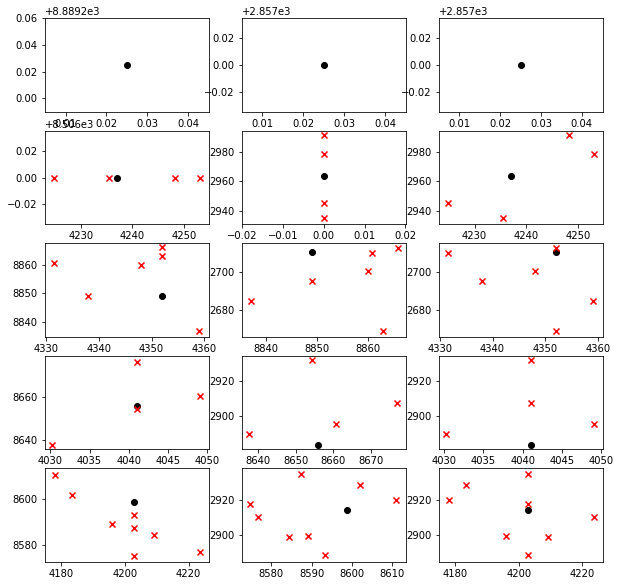

In [10]:
pre_list = list(pre_data.keys())
n = 5
pre_sample = random.sample(pre_list, n)

fig, ax = plt.subplots(n, 3, figsize=[10, 10])
for cx_id, i in zip(pre_sample, range(0, n)):
    x, y, z = pre_data[cx_id]
    ax[i, 0].scatter(x, y, c='k', marker='o')
    ax[i, 1].scatter(y, z, c='k', marker='o')
    ax[i, 2].scatter(x, z, c='k', marker='o')
    
    post_coords = post_data.get(cx_id, None)
    if post_coords is None:
        continue
    else:
        print(post_coords)
        for c in post_coords:
            x, y, z = c
            ax[i, 0].scatter(x, y, c='r', marker='x')
            ax[i, 1].scatter(y, z, c='r', marker='x')
            ax[i, 2].scatter(x, z, c='r', marker='x')
    
plt.show()